In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Continuous Probabilitstic Methods Exercises

## 1. Define a function named get_lower_and_upper_bounds that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.

In [2]:
def get_lower_and_upper_bounds(col, multiplier=1.5):
    # calculate quantiles with pd.quantile()
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    # then calculate iqr to calculate the upper/lower bounds
    iqr = q3 - q1   
    lower_bound = round(q1 -(multiplier * iqr), 3)
    upper_bound = round(q3 +(multiplier * iqr), 3)
    
    return lower_bound, upper_bound

In [3]:
lemonade = pd.read_csv('lemonade.csv')
lemonade

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18
...,...,...,...,...,...,...,...
360,12/27/17,Wednesday,42.7,1.00,33,0.5,19
361,12/28/17,Thursday,37.8,1.25,32,0.5,16
362,12/29/17,Friday,39.5,1.25,17,0.5,15
363,12/30/17,Saturday,30.9,1.43,22,0.5,13


In [4]:
lemonade.describe()

,Temperature,Rainfall,Flyers,Price,Sales
count,365.000000,365.000000,365.000000,365.0,365.000000
mean,61.224658,0.825973,40.104110,0.5,27.865753
std,18.085892,0.273890,13.786445,0.0,30.948132
min,15.100000,0.400000,-38.000000,0.5,7.000000
25%,49.700000,0.650000,31.000000,0.5,20.000000
50%,61.100000,0.740000,39.000000,0.5,25.000000
75%,71.700000,0.910000,49.000000,0.5,30.000000
max,212.000000,2.500000,80.000000,0.5,534.000000


In [44]:
def iqr_outliers(df, multiplier=1.5):
    # create empty outlier dictionary to hold values
    outliers = {}
    for col in df.columns:
        # select only columns with a number dtype
        if np.issubdtype(df[col].dtype, np.number):
            # get lower and upper bounds from other function
            lower_bound, upper_bound = get_lower_and_upper_bounds(df[col], multiplier=multiplier)
            print(f' {col}: \n upper bound: {upper_bound}\n lower bound: {lower_bound}\n')
            # create a new dict value for each column in the df
            outliers[col] = {}
            # store upper and lower bounds
            outliers[col]['bounds'] = {'upper' : upper_bound, 'lower' : lower_bound}
            # save outliers that fall below the lower bound and above the upper band
            outliers[col]['outlier'] = df[(df[col] > upper_bound) |  (df[col] < lower_bound)]
        else:
            pass
    # list comprehension that prints each outlier seperated by column
    [print('\n', key, ':\n', outliers[key]['outlier']) for key in outliers]

In [46]:
iqr_outliers(lemonade)

 Temperature: 
 upper bound: 104.7
 lower bound: 16.7

 Rainfall: 
 upper bound: 1.3
 lower bound: 0.26

 Flyers: 
 upper bound: 76.0
 lower bound: 4.0

 Price: 
 upper bound: 0.5
 lower bound: 0.5

 Sales: 
 upper bound: 45.0
 lower bound: 5.0


 Temperature :
 
          Date       Day  Temperature  Rainfall  Flyers  Price  Sales
41    2/11/17  Saturday        212.0      0.91      35    0.5     21
364  12/31/17    Sunday         15.1      2.50       9    0.5      7

 Rainfall :
 
          Date        Day  Temperature  Rainfall  Flyers  Price  Sales
0      1/1/17     Sunday         27.0      2.00      15    0.5     10
1      1/2/17     Monday         28.9      1.33      15    0.5     13
2      1/3/17    Tuesday         34.5      1.33      27    0.5     15
5      1/6/17     Friday         25.3      1.54      23    0.5     11
6      1/7/17   Saturday         32.9      1.54      19    0.5     13
10    1/11/17  Wednesday         32.6      1.54      23    0.5     12
11    1/12/17   Thursd

In [47]:
iqr_outliers(lemonade, multiplier = 3)

 Temperature: 
 upper bound: 137.7
 lower bound: -16.3

 Rainfall: 
 upper bound: 1.69
 lower bound: -0.13

 Flyers: 
 upper bound: 103.0
 lower bound: -23.0

 Price: 
 upper bound: 0.5
 lower bound: 0.5

 Sales: 
 upper bound: 60.0
 lower bound: -10.0


 Temperature :
 
        Date       Day  Temperature  Rainfall  Flyers  Price  Sales
41  2/11/17  Saturday        212.0      0.91      35    0.5     21

 Rainfall :
 
          Date      Day  Temperature  Rainfall  Flyers  Price  Sales
0      1/1/17   Sunday         27.0      2.00      15    0.5     10
338   12/5/17  Tuesday         22.0      1.82      11    0.5     10
343  12/10/17   Sunday         31.3      1.82      15    0.5     11
364  12/31/17   Sunday         15.1      2.50       9    0.5      7

 Flyers :
 
          Date      Day  Temperature  Rainfall  Flyers  Price  Sales
324  11/21/17  Tuesday         47.0      0.95     -38    0.5     20

 Price :
 
 Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price,

IQR takeaways:
   1. the lower outliers for flyers does not make sense since it is negative. That should probably be removed. The low value for temperature seems normal, its not too unusual to have a day in december get to 15 degrees
   
   2. Temperature upperbound seems like an error. A day in february at 212 degrees fahrenheit? Most likely the decimal is in the wrong place. Sales upper bound does make sense as it is during the week of fourth of july, which would see a lot of lemonade sales. I would change the temperature value and keep the sales outliers.
   
   3. For a multiplier of 3, the lower bound values all still make sense except for flyers. that should still be removed.
   
   4. The upper bound are still similar, temp needs to be modified and sales are fine. There were no upper bound for flyers, rainfall seems normal for all. 

## 2. Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns: Use 2 sigma decision rule to isolate outliers

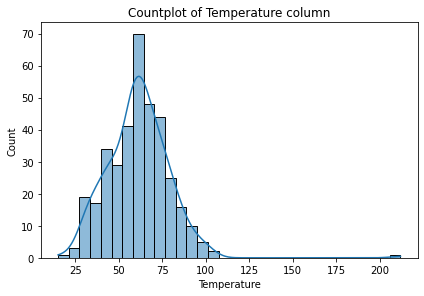

Normality Test Stat :167.85600853401706, p value : 3.55e-37


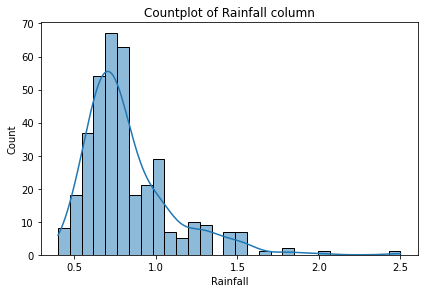

Normality Test Stat :152.07858542963368, p value : 9.47e-34


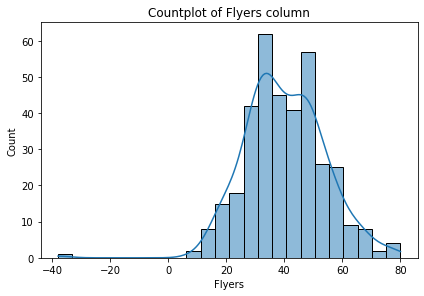

Normality Test Stat :25.203527052823677, p value : 3.37e-06


/Users/parkervoit/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


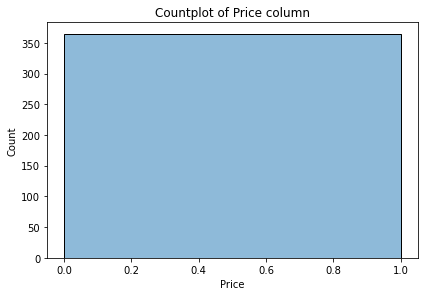

Normality Test Stat :1135.8321791161907, p value : 2.28e-247


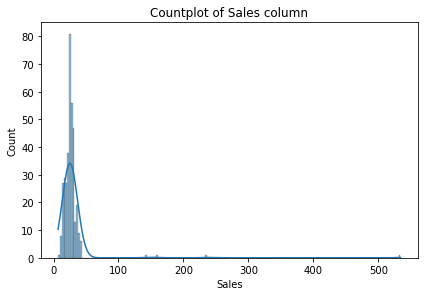

Normality Test Stat :727.032363490293, p value : 1.34e-158


In [58]:
for i in lemonade.columns:
    if np.issubdtype(lemonade[i].dtype, np.number):
        sns.histplot(x = i, data = lemonade, kde = True)
        plt.tight_layout()
        plt.title(label = (f'Countplot of {i} column'))
        plt.show()
        stat, p = stats.normaltest(lemonade[i])
        print(f'Normality Test Stat :{stat}, p value : {p:.3}')
    else:
        pass

In [59]:
def zscore_outliers(df, threshold = 2):
    # create empty outlier dictionary to hold values
    outliers = {}
    for col in df.columns:
        # select only columns with a number dtype
        if np.issubdtype(df[col].dtype, np.number):
            # get zscore
            zscore = ((df[col] - df[col].mean()) / df[col].std())
            print(f'{col} outliers :\n{(df[zscore.abs() >= threshold])}\n')
        else:
            pass

In [60]:
zscore_outliers(lemonade)

Temperature outliers :
         Date       Day  Temperature  Rainfall  Flyers  Price  Sales
41    2/11/17  Saturday        212.0      0.91      35    0.5     21
166   6/16/17    Friday         99.3      0.47      77    0.5     41
176   6/26/17    Monday        102.6      0.47      60    0.5     42
181    7/1/17  Saturday        102.9      0.47      59    0.5    143
190   7/10/17    Monday         98.0      0.49      66    0.5     40
198   7/18/17   Tuesday         99.3      0.47      76    0.5     41
202   7/22/17  Saturday         99.6      0.47      49    0.5     42
207   7/27/17  Thursday         97.9      0.47      74    0.5     43
338   12/5/17   Tuesday         22.0      1.82      11    0.5     10
364  12/31/17    Sunday         15.1      2.50       9    0.5      7

Rainfall outliers :
         Date        Day  Temperature  Rainfall  Flyers  Price  Sales
0      1/1/17     Sunday         27.0      2.00      15    0.5     10
5      1/6/17     Friday         25.3      1.54      23  

2 sigma rule takeaways:
  - for the most part, the 2 sigma rule is grabbing values that I would consider acceptable data. For instance, it is pulling out values of 99 and 98 degrees for days in the middle of july. It casts too broad of a stroke
  - The glaringly obvoius outliers should be removed but warm days in july and cold days in december shouldn't. It's a case of best judgement 

## Now use 3 sigma

In [61]:
zscore_outliers(lemonade, threshold = 3)

Temperature outliers :
       Date       Day  Temperature  Rainfall  Flyers  Price  Sales
41  2/11/17  Saturday        212.0      0.91      35    0.5     21

Rainfall outliers :
         Date      Day  Temperature  Rainfall  Flyers  Price  Sales
0      1/1/17   Sunday         27.0      2.00      15    0.5     10
15    1/16/17   Monday         30.6      1.67      24    0.5     12
338   12/5/17  Tuesday         22.0      1.82      11    0.5     10
343  12/10/17   Sunday         31.3      1.82      15    0.5     11
364  12/31/17   Sunday         15.1      2.50       9    0.5      7

Flyers outliers :
         Date      Day  Temperature  Rainfall  Flyers  Price  Sales
324  11/21/17  Tuesday         47.0      0.95     -38    0.5     20

Price outliers :
Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []

Sales outliers :
       Date       Day  Temperature  Rainfall  Flyers  Price  Sales
181  7/1/17  Saturday        102.9      0.47      59    0.5    1

3 sigma takeaways:
 - Increasing the sigma to 3 doesn't pull out as many columns, and the outliers look more like true outliers
 - Still with somehting like rainfall, I am unsure if having 2 inches of rain is too wild of an outlier. If I had to make a decision, I would drop the sales outlier, change the decimal on the temperature column, and keep all the other outliers. 